# Load Python Libraries

In [0]:
#Importing pandas and numpy

import pandas as pd
import numpy as np



# Loading Dataset

In [0]:
# Loading the csv dataset
url='http://bit.ly/Autolibdataset'
autolib_raw=pd.read_csv(url)
autolib_raw.head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


# Data Preparation


In [0]:
#Changing columns to lowercase
autolib_raw.columns=map(str.lower, autolib_raw.columns)
autolib_raw.head()


,unnamed: 0,address,cars,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,displayed comment,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [0]:
#Removing any white spaces
autolib_raw.columns=autolib_raw.columns.str.strip().str.replace(' ','-')
autolib_raw.head()

,unnamed:-0,address,cars,bluecar-counter,utilib-counter,utilib-1.4-counter,charge-slots,charging-status,city,displayed-comment,id,kind,geo-point,postal-code,public-name,rental-status,scheduled-at,slots,station-type,status,subscription-status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [0]:
#checking the number of columns and raws
autolib_raw.shape

(14421829, 26)

In [0]:
#dropping columns
autolib_raw.drop(['charging-status','displayed-comment','rental-status', 'scheduled-at','status','year','month', 'subscription-status' ], axis=1, inplace=True)


In [0]:
#checking for the number of null values in the given columns
autolib=autolib_raw
autolib.isnull().sum()

unnamed:-0            0
address               0
cars                  0
bluecar-counter       0
utilib-counter        0
utilib-1.4-counter    0
charge-slots          0
city                  0
id                    0
kind                  0
geo-point             0
postal-code           0
public-name           0
slots                 0
station-type          0
day                   0
hour                  0
minute                0
dtype: int64

# Data analysis

In [0]:
#Obtaining data on the City of paris from the autolib dataset.
paris_data=autolib[(autolib.city =='Paris')]
paris_data.head().tail()

,unnamed:-0,address,cars,bluecar-counter,utilib-counter,utilib-1.4-counter,charge-slots,city,id,kind,geo-point,postal-code,public-name,slots,station-type,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,Paris,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,1,station,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,Paris,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,3,station,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,Paris,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,2,station,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,1,station,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,Paris,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,4,station,1,0,0


In [0]:
#Finding the number of cars out by finding the difference between the bluecar-counter values at each given point
#The values are the placed ina  new column
paris_data['bluecar_busy']=paris_data['bluecar-counter'].diff()
paris_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,unnamed:-0,address,cars,bluecar-counter,utilib-counter,utilib-1.4-counter,charge-slots,city,id,kind,geo-point,postal-code,public-name,slots,station-type,day,hour,minute,bluecar_busy
0,0,24 Rue Vulpian,3,3,1,0,1,Paris,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,1,station,1,0,0,NaN
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,Paris,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,3,station,1,0,0,-3.0
2,2,4 Rue Charles Bossut,3,3,0,0,1,Paris,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,2,station,1,0,0,3.0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,1,station,1,0,0,1.0
4,4,236 Boulevard Voltaire,1,1,0,0,1,Paris,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,4,station,1,0,0,-3.0


In [0]:
#The most popular hour for the bluecar in 
#paris based on the value of cars that are out of the station by the hour
busiest_hour=paris_data[paris_data['bluecar_busy'] < 0].groupby('hour')['bluecar_busy'].sum().sort_values(ascending= True)
busiest_hour

hour
5    -360323.0
4    -360204.0
3    -357522.0
6    -354155.0
2    -353165.0
7    -347588.0
8    -337344.0
21   -327833.0
22   -326807.0
9    -324306.0
10   -322801.0
1    -314819.0
11   -313349.0
0    -307040.0
20   -305870.0
23   -305256.0
14   -301206.0
12   -299186.0
15   -297114.0
13   -293330.0
16   -292145.0
18   -287937.0
19   -287060.0
17   -286802.0
Name: bluecar_busy, dtype: float64

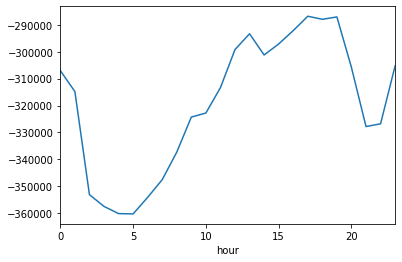

In [0]:
#A plot of the total bluecars that are out of the station against the hour.
busiest_hour=paris_data[paris_data['bluecar_busy'] < 0].groupby('hour')['bluecar_busy'].sum().plot()
busiest_hour

In [0]:
#The most popular hour for returning cars
returning_hour=paris_data[paris_data['bluecar_busy'] > 0].groupby('hour')['bluecar_busy'].sum().sort_values(ascending=False)
returning_hour

hour
5     360322.0
4     360207.0
3     357518.0
6     354160.0
2     353162.0
7     347583.0
8     337357.0
21    327827.0
22    326801.0
9     324300.0
10    322800.0
1     314824.0
11    313350.0
0     307036.0
20    305881.0
23    305269.0
14    301212.0
12    299182.0
15    297106.0
13    293323.0
16    292163.0
18    287943.0
19    287055.0
17    286783.0
Name: bluecar_busy, dtype: float64

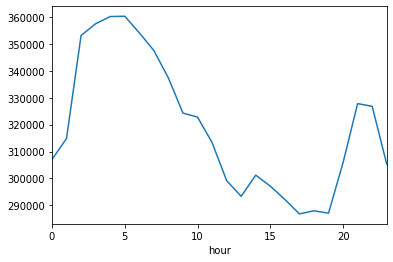

In [0]:
returning_hour=paris_data[paris_data['bluecar_busy'] > 0].groupby('hour')['bluecar_busy'].sum().plot()
returning_hour

In [0]:
#Most popular postal code for picking bluecars

busiest_post=paris_data[(paris_data['kind'] == 'STATION') & (paris_data['hour'] == 5)].groupby('postal-code')['bluecar_busy'].count().sort_values(ascending= False)
busiest_post

postal-code
75015    27272
75016    24018
75017    20742
75020    20178
75013    20168
75012    17988
75018    17464
75019    17448
75008    16884
75014    16378
75011    15827
75010    14173
75007    12545
75009    11443
75005    10363
75006     9274
75004     7650
75003     6552
75002     6531
75001     4362
75112      546
75116      545
Name: bluecar_busy, dtype: int64

In [0]:
#Most popular station for picking bluecars
#Groupby station